In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from astropy.time import Time
from astropy.table import Table
from astropy.coordinates import SkyCoord, get_sun
from astropy.coordinates import Angle
from astropy import units as u
from alerts import get_alerts, make_alerts
from datetime import datetime, date
from style import output_folder, big_fontsize, base_width, base_height, dpi, CB_color_cycle
import seaborn as sns
import json
from astropy.time import Time

In [2]:
make_alerts()

IC190922B: Two matching dates.
	148.09 degrees apart
	assuming it's two alerts at the same day
IC200107A: No notice becasue selected offline
IC200926A: Two matching dates.
	94.11 degrees apart
	assuming it's two alerts at the same day
IC160427A: selecting the third notice of 4
IC160731A: Two matching dates.
	0.56 degrees apart
	assuming second notice is refined info from circular. choosing first one
IC161103A: Two matching dates.
	0.07 degrees apart
	assuming second notice is refined info from circular. choosing first one
IC161210A: Two matching dates.
	1.07 degrees apart
	assuming it's two alerts at the same day
IC190922A: Two matching dates.
	148.09 degrees apart
	assuming it's two alerts at the same day
IC200926B: Two matching dates.
	94.11 degrees apart
	assuming it's two alerts at the same day
IC201115A: Two matching dates.
	49.55 degrees apart
	assuming it's two alerts at the same day
IC201115B: Two matching dates.
	49.55 degrees apart
	assuming it's two alerts at the same day
IC

In [2]:
alerts = get_alerts()

In [3]:
alerts

,Event,Class,RA,RA Unc (rectangle),Dec,Dec Unc (rectangle),arrival time [UT],Signalness,initial RA,initial Dec,...,12h coverage,24h coverage,2d coverage,3d coverage,4d coverage,5d coverage,6d coverage,7d coverage,14d coverage,observed
23,IC160427A,HESE,240.57,"[0.6, -0.6]",9.34,"[0.6, -0.6]",2016-04-27 05:52:32.00,NaN,239.6639,6.8528,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,True
24,IC160731A,EHE,214.50,"[0.75, -0.75]",-0.33,"[0.75, -0.75]",2016-07-31 01:55:04.00,0.84879,214.5440,-0.3347,...,36.2,36.2,36.2,36.2,100.0,100.0,100.0,100.0,100.0,True
24,IC160731A,HESE,214.50,"[0.75, -0.75]",-0.33,"[0.75, -0.75]",2016-07-31 01:55:04.00,NaN,215.1090,-0.4581,...,36.2,36.2,36.2,36.2,100.0,100.0,100.0,100.0,100.0,True
25,IC160806A,EHE,122.81,"[0.5, 0.5]",-0.81,"[0.5, -0.5]",2016-08-06 12:21:33.00,0.28016,122.7980,-0.7331,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
26,IC160814A,HESE,200.30,"[2.43, -3.03]",-32.40,"[1.39, -1.21]",2016-08-14 21:45:54.00,NaN,199.3100,-32.0165,...,0.0,0.0,60.6,100.0,100.0,100.0,100.0,100.0,100.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,IC210608A,BRONZE,337.41,"[4.89, -11.64]",18.37,"[3.75, -3.24]",2021-06-08 03:41:00.97,0.31467,337.0182,18.6470,...,88.5,94.8,99.4,100.0,100.0,100.0,100.0,100.0,100.0,True
21,IC210629A,BRONZE,340.75,"[1.11, -2.23]",12.94,"[0.91, -0.93]",2021-06-29 18:09:44.22,0.35075,340.6350,12.6111,...,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,True
83,IC210717A,EXTRA,46.49,"[2.40, -2.57]",-1.34,"[2.63, -3.41]",2021-07-17 15:45:19.48,0.50000,NaN,NaN,...,13.8,69.2,69.2,100.0,100.0,100.0,100.0,100.0,100.0,True
84,IC210730A,BRONZE,105.73,"[2.00, -1.85]",14.79,"[0.91, -0.86]",2021-07-30 22:12:40.62,0.31923,105.8360,14.8168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


In [4]:
alerts[~alerts.retracted & alerts['2h coverage'].isna()]

,Event,Class,RA,RA Unc (rectangle),Dec,Dec Unc (rectangle),arrival time [UT],Signalness,initial RA,initial Dec,...,12h coverage,24h coverage,2d coverage,3d coverage,4d coverage,5d coverage,6d coverage,7d coverage,14d coverage,observed
46,IC190504A,HESE,65.7866,NaN,-37.4431,NaN,2019-05-04 18:25:18.39,NaN,65.7866,-37.4431,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
59,IC200227A,BRONZE,348.2600,NaN,21.3200,NaN,2020-02-27 05:36:31.49,0.35075,348.2598,21.3235,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


85 alerts in total
12 alerts retracted
56 observed by ASAS-SN
15 not observed
15 observed within 2 hours
41 observed within 14 days
2 alerts missing direction uncertainties


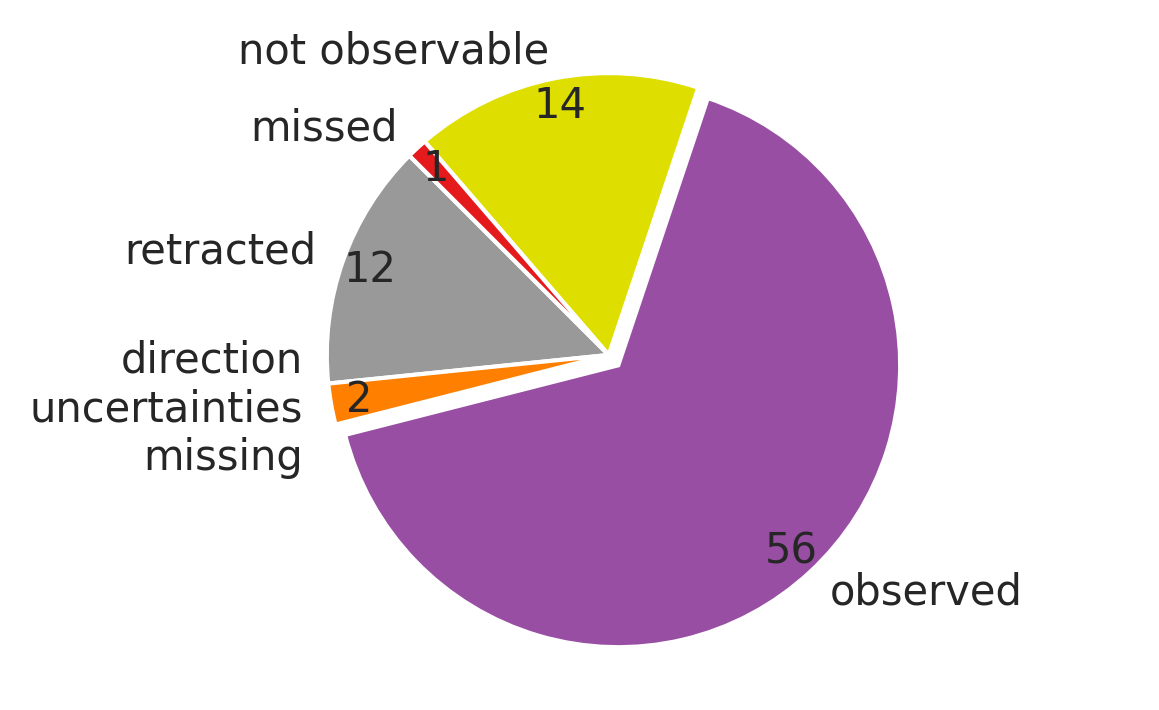

In [5]:

Nalerts = len(alerts.Event.unique())
N_retracted = len(alerts[alerts.retracted].Event.unique())
Nalerts_observed = len(alerts[alerts.observed].Event.unique())
Nalerts_unobserved = len(alerts[~alerts.observed & ~alerts.retracted & ~alerts["direction uncertainty missing"]].Event.unique())
N_observed_2h = len(alerts[alerts["2h coverage"]>0].Event.unique())
N_dir_missing = len(alerts[alerts["direction uncertainty missing"]])
N_not_observable = 14
N_observable_not_observed = 1

print(
    f"{Nalerts} alerts in total\n" \
    f"{N_retracted} alerts retracted\n" \
    f"{Nalerts_observed} observed by ASAS-SN\n" \
    f"{Nalerts_unobserved} not observed\n" \
    f"{N_observed_2h} observed within 2 hours\n" \
    f"{Nalerts_observed-N_observed_2h} observed within 14 days\n" \
    f"{N_dir_missing} alerts missing direction uncertainties"
)

labels = ['retracted', 'direction\nuncertainties\nmissing', 'observed', 'not observable', 'missed']
sizes = [N_retracted, N_dir_missing, Nalerts_observed, N_not_observable, N_observable_not_observed]
explode = [0, 0, 0.05, 0, 0]

assert len(labels) == len(sizes)

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
#         return '{p:.0f}%\n({v:d})'.format(p=pct,v=val)
        return f"{val:.0f}"
    return my_autopct


fig, ax = plt.subplots(figsize=(base_width, base_height), dpi=dpi)
ax.pie(sizes, labels=labels, autopct=make_autopct(sizes),
        shadow=False, startangle=135,
       pctdistance=0.9,
       textprops={'fontsize': big_fontsize},
      colors=np.array(CB_color_cycle)[[6, 1, 5, 8, 7]],
      explode=explode)
ax.axis('equal')
fig.tight_layout()
fig.savefig("../figures/alert_stats_piechart.pdf")
plt.show()
plt.close()

85 alerts in total
12 alerts retracted
56 observed by ASAS-SN
15 not observed
15 observed within 2 hours
41 observed within 14 days
2 alerts missing direction uncertainties


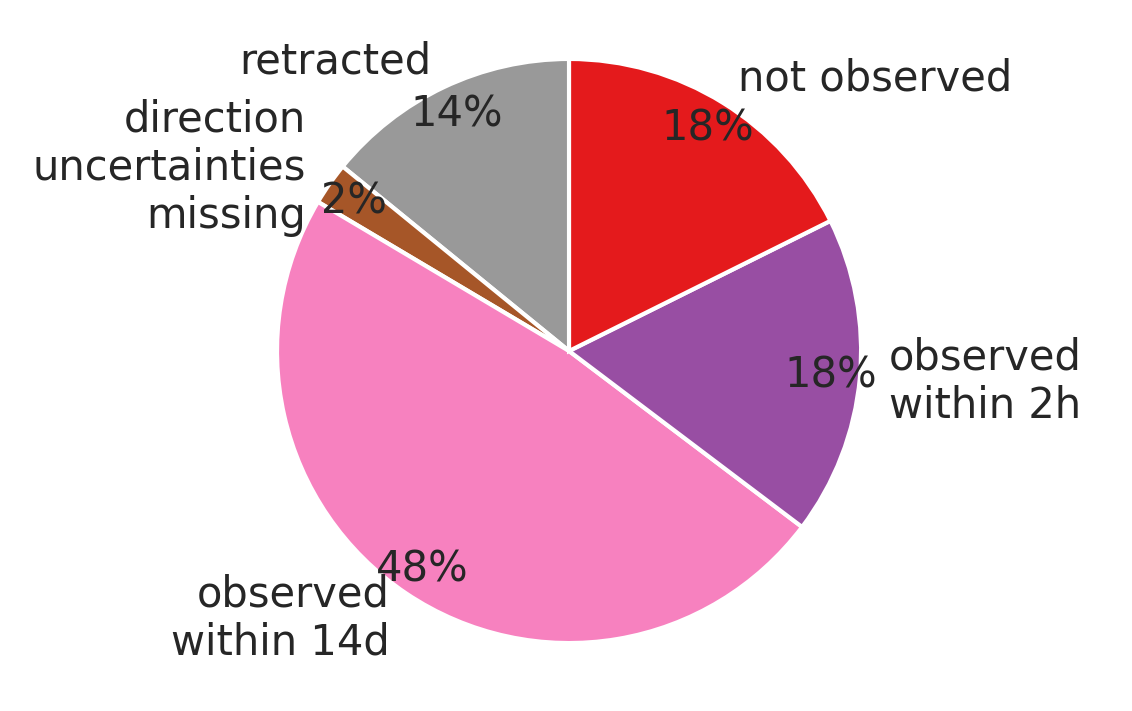

In [6]:

Nalerts = len(alerts.Event.unique())
N_retracted = len(alerts[alerts.retracted].Event.unique())
Nalerts_observed = len(alerts[alerts.observed].Event.unique())
Nalerts_unobserved = len(alerts[~alerts.observed & ~alerts.retracted & ~alerts["direction uncertainty missing"]].Event.unique())
N_observed_2h = len(alerts[alerts["2h coverage"]>0].Event.unique())
N_dir_missing = len(alerts[alerts["direction uncertainty missing"]])

print(
    f"{Nalerts} alerts in total\n" \
    f"{N_retracted} alerts retracted\n" \
    f"{Nalerts_observed} observed by ASAS-SN\n" \
    f"{Nalerts_unobserved} not observed\n" \
    f"{N_observed_2h} observed within 2 hours\n" \
    f"{Nalerts_observed-N_observed_2h} observed within 14 days\n" \
    f"{N_dir_missing} alerts missing direction uncertainties"
)

labels = ['retracted', 'direction\nuncertainties\nmissing', 'observed\nwithin 14d', 'observed\nwithin 2h', 'not observed']
sizes = [N_retracted, N_dir_missing, Nalerts_observed-N_observed_2h, N_observed_2h, Nalerts_unobserved]
explode = [0, 0, 0, 0, 0]

assert len(labels) == len(sizes)

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
#         return '{p:.0f}%\n({v:d})'.format(p=pct,v=val)
        return f"{val/total *100:.0f}%"
    return my_autopct


fig, ax = plt.subplots(figsize=(base_width, base_height), dpi=dpi)
ax.pie(sizes, labels=labels, autopct=make_autopct(sizes),
        shadow=False, startangle=90,
       pctdistance=0.9,
       textprops={'fontsize': big_fontsize},
      colors=np.array(CB_color_cycle)[[6, 4, 3, 5, 7]],
      explode=explode)
ax.axis('equal')
fig.tight_layout()
fig.savefig("../figures/alert_stats_piechart_relative.pdf")
plt.show()
plt.close()

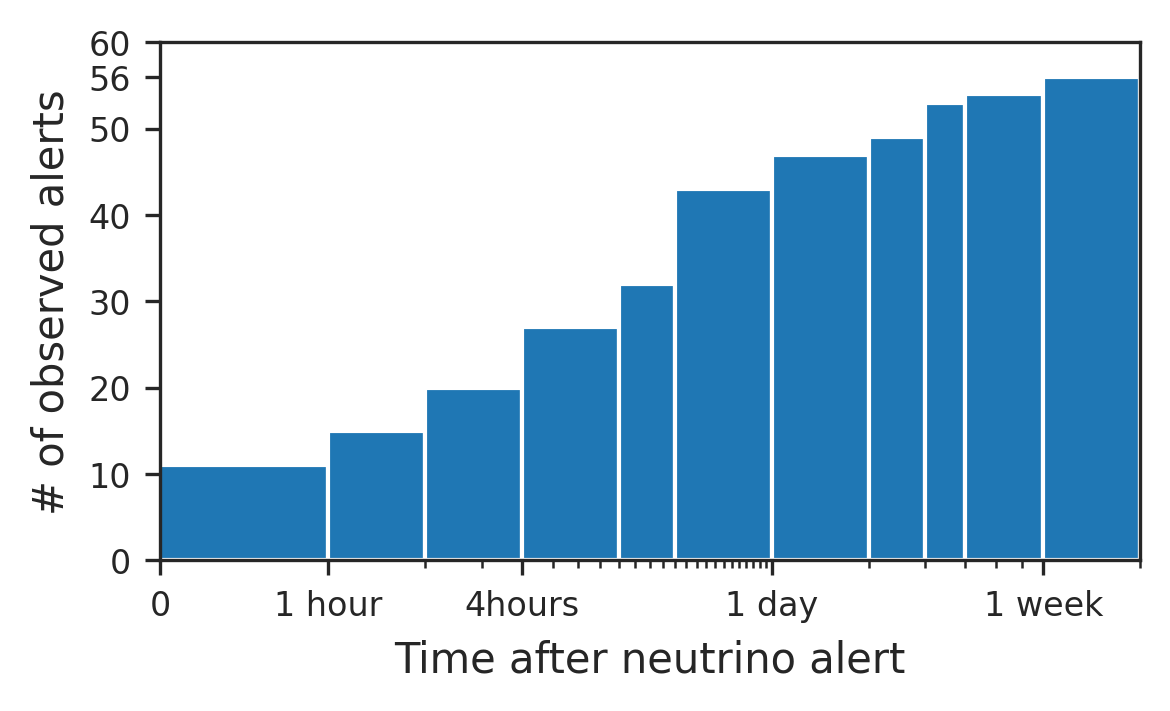

In [5]:
dupe = alerts.Event.duplicated()


coverge_columns = [c for c in alerts.columns if 'coverage' in c]
coverage_values = list()
for c in coverge_columns:
    vv = c.strip(' coverage')
    val = float(vv[:-1])
    unit = u.Unit(vv[-1])
    coverage_values.append(val*unit)

alerts['covered after h'] = np.inf
    
for i, r in alerts.iterrows():
    covs = r[coverge_columns]
    w = np.where(covs > 0)[0]
    if len(w) > 0:
        if min(w) > 0:
            val = coverage_values[min(w)-1].to('h').value
        else:
            val = 0
        alerts.loc[i, 'covered after h'] = val
    
selcov = coverage_values[:9] + coverage_values[-2:]
bins = [0] + [c.to('h').value for c in selcov] + [2*7*24]
    
fig, ax = plt.subplots(figsize=(base_width, base_height), dpi=dpi)
h = ax.hist(alerts['covered after h'][alerts.observed & ~dupe], bins=bins, cumulative=True)
ax.set_xscale('log')

minor_ticks =  list(range(1, 24)) + list(np.array(range(1, 7)) * 24) + list(np.array(range(1, 3))*24*7)
xticks = [0.3, 1, 4, 24, 168]
xticklabels = ['0', '1 hour', '4hours', '1 day', '1 week']

yticks = ax.get_yticks()
yticks = list(yticks) + [sum(alerts.observed[~dupe])]
ax.set_yticks(yticks)


ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.set_xticks(minor_ticks, minor=True)
ax.set_xticklabels(['']*len(minor_ticks), minor=True)
ax.set_xlabel('Time after neutrino alert')
ax.set_ylabel('# of observed alerts')

#ax2 = ax.twinx()
#ax2.hist(alerts['covered after h'][alerts.observed & ~dupe], bins=bins, cumulative=True, density=True)
#ps = np.array([0, 0.25, 0.5, 0.75, 1])
#ax2.set_yticks(ps)
#ax2.set_yticklabels((ps*100).astype(int))
#ax2.set_ylabel('Percentage of alerts')
#ax2.grid()
ax.set_xlim((0.3, max(minor_ticks)))
fig.tight_layout()
fig.savefig('../figures/time_of_observation.pdf')
plt.show()

In [17]:
N, b = np.histogram(alerts['covered after h'][~dupe], bins=[0, 1, 24, 24*300])
N

array([11, 32, 13])

In [27]:
max(alerts['covered after h'][alerts.observed]) / 24

7.0

In [30]:
alerts[(alerts['covered after h'] > 72) & alerts.observed]

,Event,Class,RA,RA Unc (rectangle),Dec,Dec Unc (rectangle),arrival time [UT],Signalness,initial RA,initial Dec,...,24h coverage,2d coverage,3d coverage,4d coverage,5d coverage,6d coverage,7d coverage,14d coverage,observed,covered after h
5,IC200107A,EXTRA,148.18,"[2.2, -1.83]",35.46,"[1.1, -1.22]",2020-01-07 09:42:18.36,0.50000,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.2,True,168.0
73,IC201115A,GOLD,195.12,"[1.27, -1.49]",1.38,"[1.3, -1.11]",2020-11-15 02:07:26.21,0.45973,193.7576,1.2903,...,0.0,0.0,0.0,0.0,72.4,72.4,72.4,100.0,True,96.0
76,IC201221A,GOLD,261.69,"[2.29, -2.5]",41.81,"[1.29, -1.2]",2020-12-21 12:36:53.45,0.56429,262.5451,41.4062,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,True,168.0


In [128]:
m = (alerts['7d coverage'] == 0) & (alerts['14d coverage'] > 0)
sum(m)

2

In [133]:
m = (alerts['4d coverage'] == 0) & (alerts['5d coverage'] > 0)
sum(m)

1

(array([ 5.,  9., 13., 14., 18., 28., 42., 54., 73., 85.]),
 array([16918. , 17111.2, 17304.4, 17497.6, 17690.8, 17884. , 18077.2,
        18270.4, 18463.6, 18656.8, 18850. ]),
 <BarContainer object of 10 artists>)

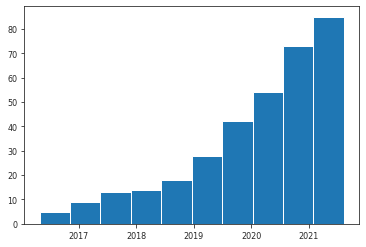

In [7]:
t = [date.fromisoformat(ts.split(' ')[0]) for ts in alerts['arrival time [UT]'].unique()]
plt.hist(t, cumulative=True)

In [121]:
alerts['covered after h'][alerts.observed].max()

168.0

In [20]:
len(labels) 

3

In [209]:
alerts[(alerts.Class == 'BRONZE') | (alerts.Class == 'GOLD')]

,Event,Class,RA,RA Unc (rectangle),Dec,Dec Unc (rectangle),arrival time [UT],Signalness,initial RA,initial Dec,initial Error90 [arcmin],retracted,RA Unc (rectangle) float,Dec Unc (rectangle) float,2h coverage,14d coverage,observed
1,IC190619A,GOLD,343.26,"[4.08, -2.63]",10.73,"[1.51, -2.61]",2019-06-19 13:14:18.04,0.55000,342.7772,10.0547,40.28,False,"[4.08, -2.63]","[1.51, -2.61]",0.0,100.0,True
48,IC190629A,BRONZE,27.22,NaN,84.33,"[4.95, -3.13]",2019-06-29 19:24:15.12,0.33892,25.6392,84.5382,114.81,False,None,"[4.95, -3.13]",0.0,70.6,True
49,IC190704A,BRONZE,161.85,"[2.16, -4.33]",27.11,"[1.81, -1.83]",2019-07-04 18:48:52.25,0.48607,161.4080,27.4190,51.00,False,"[2.16, -4.33]","[1.81, -1.83]",0.0,100.0,True
50,IC190712A,BRONZE,76.46,"[5.09, -6.83]",13.06,"[4.48, -3.44]",2019-07-12 01:15:17.38,0.30332,78.8869,12.4438,117.35,False,"[5.09, -6.83]","[4.48, -3.44]",0.0,13.1,True
2,IC190730A,GOLD,225.79,"[1.28, -1.43]",10.47,"[1.14, -0.89]",2019-07-30 20:50:41.31,0.67000,226.8302,10.5078,45.31,False,"[1.28, -1.43]","[1.14, -0.89]",0.0,100.0,True
51,IC190819A,BRONZE,148.80,"[2.07, -3.24]",1.38,"[1.0, -0.75]",2019-08-19 17:34:24.23,0.29215,148.8070,0.9571,30.80,False,"[2.07, -3.24]","[1.0, -0.75]",0.0,0.0,False
52,IC190922A,GOLD,167.43,"[3.4, -2.63]",-22.39,"[2.88, -2.89]",2019-09-22 09:42:45.62,0.20165,166.9361,-24.5066,199.90,False,"[3.4, -2.63]","[2.88, -2.89]",0.0,0.0,False
3,IC190922B,GOLD,5.76,"[1.19, -1.37]",-1.57,"[0.93, -0.82]",2019-09-22 23:03:55.56,0.51000,6.0049,-1.4881,38.02,False,"[1.19, -1.37]","[0.93, -0.82]",0.0,100.0,True
4,IC191001A,GOLD,314.08,"[6.56, -2.26]",12.94,"[1.5, -1.47]",2019-10-01 20:09:18.17,0.59000,314.3550,12.5755,47.20,False,"[6.56, -2.26]","[1.5, -1.47]",0.0,100.0,True
53,IC191119A,GOLD,230.10,"[4.76, -6.48]",3.17,"[3.36, -2.09]",2019-11-19 01:01:29.38,0.44999,228.6680,3.3500,35.14,False,"[4.76, -6.48]","[3.36, -2.09]",0.0,0.0,False


In [2]:
obs = pd.read_csv("data/nu_alerts_observed.csv", skiprows=[0, 1, 2])


obs = obs[~np.isnan(obs["RA"])]

non = pd.read_csv("data/nu_alerts_unobserved.csv", skiprows=[0, 1], usecols=range(11))

# Observed alerts (Table 1)

In [175]:
m = list()
for i, r in alerts.iterrows():
    try:
        ras = r["RA Unc (rectangle) float"]
        decs = r["Dec Unc (rectangle) float"]   
        delta_r = ras[0] - ras[1]
    except TypeError:
        m.append(i)
alerts.loc[m]

,Event,Class,RA,RA Unc (rectangle),Dec,Dec Unc (rectangle),arrival time [UT],Signalness,initial RA,initial Dec,initial Error90 [arcmin],retracted,RA Unc (rectangle) float,Dec Unc (rectangle) float,2h coverage,14d coverage,observed
34,IC171028A,HESE,NaN,NaN,NaN,NaN,2017-10-28 08:28:14.81,0.226141,275.0760,34.5011,534.00,True,None,None,NaN,NaN,False
36,IC180423A,HESE,NaN,NaN,NaN,NaN,2018-04-23 02:28:40.98,0.477273,294.8820,71.9530,534.00,True,None,None,NaN,NaN,False
40,IC181031A,HESE,NaN,NaN,NaN,NaN,2018-10-31 02:02:51.41,0.477273,182.7920,-68.3884,73.79,True,None,None,NaN,NaN,False
43,IC190205A,HESE,NaN,NaN,NaN,NaN,2019-02-05 21:21:10.50,0.262467,128.6959,-53.3143,73.79,True,None,None,NaN,NaN,False
46,IC190504A,HESE,65.7866,NaN,-37.4431,NaN,2019-05-04 18:25:18.39,0.439614,65.7866,-37.4431,73.79,False,None,None,NaN,NaN,False
47,IC190529A,HESE,NaN,NaN,NaN,NaN,2019-05-29 01:55:22.21,0.477273,287.3190,78.1432,534.00,True,None,None,NaN,NaN,False
48,IC190629A,BRONZE,27.2200,NaN,84.3300,"[4.95, -3.13]",2019-06-29 19:24:15.12,0.338920,25.6392,84.5382,114.81,False,None,"[4.95, -3.13]",0.0,70.6,True
58,IC200120A,BRONZE,NaN,NaN,NaN,NaN,2020-01-20 18:48:18.55,NaN,67.7381,-14.5870,30.80,True,None,None,NaN,NaN,False
59,IC200227A,BRONZE,348.2600,NaN,21.3200,NaN,2020-02-27 05:36:31.49,0.350750,348.2598,21.3235,30.80,False,None,None,NaN,NaN,False
66,IC200728A,GOLD,NaN,NaN,NaN,NaN,2020-07-28 08:17:51.99,NaN,117.5554,-24.8475,30.80,True,None,None,NaN,NaN,False


In [11]:
m = alerts['observed'] & (~alerts.retracted)


text = ""


tot_area = 0.

for index, row in alerts[m].iterrows():
    
    if (row.Event == 'IC160731A') & (row.Class == 'HESE'):
        continue
        
    
    name = str(row["Event"].lower())
    ras = row["RA Unc (rectangle) float"]
    decs = row["Dec Unc (rectangle) float"]   

    if row['Event'] in ['IC190504A', 'IC200227A']:
        area = row['initial Error90 [arcmin]']**2 *4*np.pi
    try:
        if row['Event'] == 'IC190629A':
            delta_r = 2*np.pi
        
        else:
            delta_r = ras[0] - ras[1]
        delta_d = decs[0] - decs[1]

        area = delta_r * delta_d  * np.cos(np.radians(float(row["Dec"])))
    except TypeError:
        print(row, '\n')
        area = np.nan
        
    if not np.isnan(area):
        tot_area += area * row["14d coverage"]/100

    if np.isnan(float(row["Signalness"])):
        s = "-"
    else:
        s = f'{100.*row["Signalness"]:.0f}'
        
    if row.Class == 'HESE':
        s += "$^{*}$"
    if row.Class == 'EXTRA':
        s += "$^{**}$"
        
    ref = '-' if row.Event == "IC160731A" else f"\cite{{{name}}}"

    text += f'{row["Event"]} & {row["RA"]} & {row["Dec"]:+.2f} & {area:.1f} & {row["24h coverage"]} & {row["14d coverage"]} & {s} & {ref} \\\ \n'

    #text += f'\t &&&&&& \cite{{{name}_ztf}} \\\\ \n'
    #if not isinstance(row["Additional ZTF GCN"], float):
    #    text += f'\t &&&&&& \cite{{{name}_ztf_2}} \\\\ \n'

    #tot_area += row["Observed area (corrected for chip gaps)"]

print(text)

with open(f'../latex/alert_table_observed.tex', 'w') as f:
    f.write(text)
    
print(tot_area)

IC160427A & 240.57 & +9.34 & 1.4 & 100.0 & 100.0 & -$^{*}$ & \cite{ic160427a} \\ 
IC160731A & 214.5 & -0.33 & 2.2 & 36.2 & 100.0 & 85 & - \\ 
IC160814A & 200.3 & -32.40 & 12.0 & 0.0 & 100.0 & -$^{*}$ & \cite{ic160814a} \\ 
IC161103A & 40.83 & +12.56 & 3.1 & 79.9 & 100.0 & -$^{*}$ & \cite{ic161103a} \\ 
IC161210A & 46.58 & +14.98 & 1.7 & 0.0 & 100.0 & 49 & \cite{ic161210a} \\ 
IC170312A & 305.15 & -26.61 & 0.9 & 0.0 & 100.0 & -$^{*}$ & \cite{ic170312a} \\ 
IC170321A & 98.3 & -15.02 & 5.6 & 4.5 & 100.0 & 28 & \cite{ic170321a} \\ 
IC170922A & 77.43 & +5.72 & 1.3 & 100.0 & 100.0 & 57 & \cite{ic170922a} \\ 
IC171106A & 340.0 & +7.40 & 0.7 & 100.0 & 100.0 & 75 & \cite{ic171106a} \\ 
IC181023A & 270.18 & -8.57 & 9.3 & 70.5 & 100.0 & 28 & \cite{ic181023a} \\ 
IC190104A & 357.98 & -26.65 & 18.5 & 14.0 & 100.0 & -$^{*}$ & \cite{ic190104a} \\ 
IC190221A & 268.81 & -17.04 & 5.2 & 78.6 & 100.0 & -$^{*}$ & \cite{ic190221a} \\ 
IC190331A & 337.68 & -20.70 & 0.4 & 0.0 & 100.0 & -$^{*}$ & \cite{ic19033

In [169]:
a = alerts[m]
len(a[a.Class == 'HESE']) / len(a)

0.14035087719298245

In [196]:
len(alerts[(alerts.Class == 'HESE') & (~alerts.retracted) & (~alerts.observed)]) 

4

# Not observed

In [194]:
m = ~alerts['observed'] & (~alerts['retracted'])

text = r"""
\begin{table*}
\clearpage
\onecolumn
\centering
    \begin{longtable}{c c c c c c c c} 
         \hline
         \textbf{Event} & \textbf{R.A. (J2000)} & \textbf{Dec (J2000)} & \textbf{90\% area} & \textbf{Refs}\\
         & \textbf{[deg]}&\textbf{[deg]}& \textbf{[sq. deg.]} & \\
         \hline
"""

tot_area = 0.

for index, row in alerts[m].iterrows():
    
    
    name = str(row["Event"].lower())
    ras = row["RA Unc (rectangle) float"]
    decs = row["Dec Unc (rectangle) float"]   

    try:
        if row['Event'] in ['IC190629A', 'IC190504A', 'IC200227A']:
            continue
        else:
            delta_r = ras[0] - ras[1]
        delta_d = decs[0] - decs[1]

        area = delta_r * delta_d  * np.cos(np.radians(float(row["Dec"])))
    except TypeError:
        print(row, '\n')
        area = np.nan
        
    sun_pos = get_sun(Time(row['arrival time [UT]']))
    alert_pos = SkyCoord(row["RA"], row["Dec"], unit='deg').transform_to('gcrs')
    sep = alert_pos.separation(sun_pos).to('deg').value

    text += f'\t {row["Event"]} & {row["RA"]} & {row["Dec"]:+.2f} & {area:.1f} & \cite{{{name}}} \\\ \n'

    #text += f'\t &&&&&& \cite{{{name}_ztf}} \\\\ \n'
    #if not isinstance(row["Additional ZTF GCN"], float):
    #    text += f'\t &&&&&& \cite{{{name}_ztf_2}} \\\\ \n'

    text += "\t \hline"

    #tot_area += row["Observed area (corrected for chip gaps)"]

text += f"""
    \caption{{Summary of the {len(alerts[m])-2} neutrino alerts that could not be observed with ASAS-SN.}}
    \label{{tab:nu_alerts}}
    \end{{longtable}}
\clearpage
\\twocolumn
\end{{table*}}
"""

print(text)

with open(f'../latex/alert_table_not_observed.tex', 'w') as f:
    f.write(text)


\begin{table*}
\clearpage
\onecolumn
\centering
    \begin{longtable}{c c c c c c c c} 
         \hline
         \textbf{Event} & \textbf{R.A. (J2000)} & \textbf{Dec (J2000)} & \textbf{90\% area} & \textbf{Refs}\\
         & \textbf{[deg]}&\textbf{[deg]}& \textbf{[sq. deg.]} & \\
         \hline
	 IC160806A & 122.81 & -0.81 & 0.0 & \cite{ic160806a} \\ 
	 \hline	 IC171015A & 162.86 & -15.44 & 14.9 & \cite{ic171015a} \\ 
	 \hline	 IC180908A & 144.58 & -2.13 & 6.3 & \cite{ic180908a} \\ 
	 \hline	 IC181014A & 225.15 & -34.80 & 10.5 & \cite{ic181014a} \\ 
	 \hline	 IC190124A & 307.4 & -32.18 & 2.0 & \cite{ic190124a} \\ 
	 \hline	 IC190819A & 148.8 & +1.38 & 9.3 & \cite{ic190819a} \\ 
	 \hline	 IC190922A & 167.43 & -22.39 & 32.2 & \cite{ic190922a} \\ 
	 \hline	 IC191119A & 230.1 & +3.17 & 61.2 & \cite{ic191119a} \\ 
	 \hline	 IC200421A & 87.93 & +8.23 & 24.4 & \cite{ic200421a} \\ 
	 \hline	 IC200806A & 157.25 & +47.75 & 1.8 & \cite{ic200806a} \\ 
	 \hline	 IC200921A & 195.29 & +26.24 & 12.0

In [6]:
m = ~alerts['observed'] & (~alerts['retracted'])

text = ""

tot_area = 0.

for index, row in alerts[m].iterrows():
    
    
    name = str(row["Event"].lower())
    ras = row["RA Unc (rectangle) float"]
    decs = row["Dec Unc (rectangle) float"]   

    try:
        if row['Event'] in ['IC190629A', 'IC190504A', 'IC200227A']:
            continue
        else:
            delta_r = ras[0] - ras[1]
        delta_d = decs[0] - decs[1]

        area = delta_r * delta_d  * np.cos(np.radians(float(row["Dec"])))
    except TypeError:
        print(row, '\n')
        area = np.nan
        
    sun_pos = get_sun(Time(row['arrival time [UT]']))
    alert_pos = SkyCoord(row["RA"], row["Dec"], unit='deg').transform_to('gcrs')
    sep = alert_pos.separation(sun_pos).to('deg').value

    text += f'\t {row["Event"]} & {row["RA"]} & {row["Dec"]:+.2f} & {area:.1f} & {row["reason"]} & \cite{{{name}}} \\\ \n'



print(text)

with open(f'../latex/alert_table_not_observed.tex', 'w') as f:
    f.write(text)

	 IC160806A & 122.81 & -0.81 & 0.0 & proximity to sun & \cite{ic160806a} \\ 
	 IC171015A & 162.86 & -15.44 & 14.9 & proximity to sun & \cite{ic171015a} \\ 
	 IC180908A & 144.58 & -2.13 & 6.3 & proximity to sun & \cite{ic180908a} \\ 
	 IC181014A & 225.15 & -34.80 & 10.5 & proximity to sun & \cite{ic181014a} \\ 
	 IC190124A & 307.4 & -32.18 & 2.0 & proximity to sun & \cite{ic190124a} \\ 
	 IC190819A & 148.8 & +1.38 & 9.3 & proximity to sun & \cite{ic190819a} \\ 
	 IC190922A & 167.43 & -22.39 & 32.2 & proximity to sun & \cite{ic190922a} \\ 
	 IC191119A & 230.1 & +3.17 & 61.2 & proximity to sun & \cite{ic191119a} \\ 
	 IC200421A & 87.93 & +8.23 & 24.4 & operation & \cite{ic200421a} \\ 
	 IC200806A & 157.25 & +47.75 & 1.8 & proximity to sun & \cite{ic200806a} \\ 
	 IC200921A & 195.29 & +26.24 & 12.0 & proximity to sun & \cite{ic200921a} \\ 
	 IC200926B & 184.75 & +32.93 & 9.0 & proximity to sun & \cite{ic200926b} \\ 
	 IC201014A & 221.22 & +14.44 & 1.9 & proximity to sun & \cite{ic201014a} 

In [164]:
sun_pos.transform_to('icrs')

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, AU)
    (152.32152731, 12.3725063, 0.00915706)>

['Observed', 'Alert Retraction', 'Low Altitude', 'Poor Signalness \n and Localisation', 'Proximity to Sun', 'Separation from Galactic Plane', 'Southern Sky', 'Telescope Maintenance']


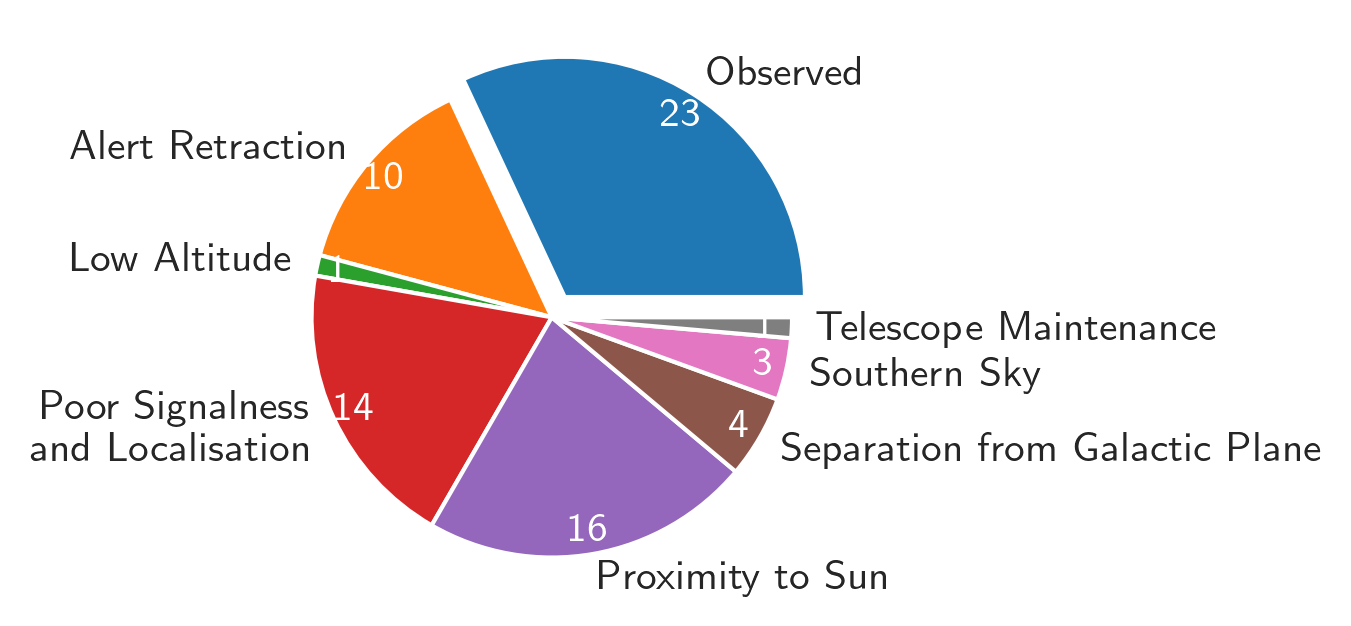

In [4]:
plt.figure(figsize=(base_width, base_height), dpi=dpi)
ax1 = plt.subplot(111)

reasons = [x if x != "Poor Signalness and Localisation" else "Poor Signalness \n and Localisation" for x in non["Rejection reason"]]

reasons = [x for i, x in enumerate(reasons) if float(non["Event"][i][2:6]) > 1803]
labels = sorted(list(set(reasons)))

sizes = []

for l in labels:
    sizes.append(list(reasons).count(l))
    
explode =[0.1] + [0.0 for _ in labels]

labels = ["Observed"] + labels
sizes = [len(obs)] + sizes

def absolute_value(val):
    a  = np.round(val/100.*np.sum(sizes), 0)
    return int(a)

print(labels)

patches, texts, autotexts = ax1.pie(sizes, 
                                    explode=explode, 
                                    labels=labels, 
                                    autopct=absolute_value,
                                    pctdistance=0.9,
                                    textprops={'fontsize': big_fontsize}
                                   )

[autotext.set_color('white') for autotext in autotexts]


ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

filename = "pie.pdf"

output_path = os.path.join(output_folder, filename)
plt.savefig(f"plots/{filename}")
plt.savefig(output_path, bbox_inches='tight', pad_inches=0)


# Appendix table

In [7]:
joint = pd.concat([non, obs], axis=0).sort_values(by=['Event'])

text = fr"""
\begin{{longtable}}[c]{{||c c c c c c ||}}
\caption{{Summary of all {len(joint)} neutrino alerts issued since under the IceCube Realtime Program. Directions are not indicated for retracted events.}} \label{{tab:all_nu_alerts}} \\
 \hline
 \textbf{{Event}} & \textbf{{R.A. (J2000)}} & \textbf{{Dec (J2000)}} & \textbf{{90\% area}} &~ \textbf{{Signalness}}& \textbf{{Ref}}\\
 & \textbf{{[deg]}}&\textbf{{[deg]}} & \textbf{{[sq. deg.]}} &&\\
 \hline
\endfirsthead
 \hline
\textbf{{Event}} & \textbf{{R.A. (J2000)}} & \textbf{{Dec (J2000)}} & \textbf{{90\% area}} &~ \textbf{{Signalness}}& \textbf{{Ref}}\\
 & \textbf{{[deg]}}&\textbf{{[deg]}} & \textbf{{[sq. deg.]}} &&\\
 \hline
\endhead
\hline
\endfoot
\hline
\endlastfoot
\hline%
"""

for index, row in joint.iterrows():
    
    name = str(row["Event"].lower())
    
    if not isinstance(row["RA Unc (rectangle)"], float):
        
        ras = json.loads(str(row["RA Unc (rectangle)"]))

        decs = json.loads(row["Dec Unc (rectangle)"])    

        delta_r = ras[0] - ras[1]
        delta_d = decs[0] - decs[1]

        area = f'{delta_r * delta_d  * np.cos(np.radians(float(row["Dec"]))):.1f}'

    else:
        area = "-"

    if np.isnan(float(row["Signalness"])):
        s = "-"
    else:
        s = f'{100.*row["Signalness"]:.0f}\%'

    if np.isnan(float(row["Dec"])):
        r = "-"
        d = "-"
    else:
        r = f'{row["RA"]}'
        d = f'{row["Dec"]:+.2f}'
        
    if name not in ["ic160731a", "ic160814a", "ic170312a"]:
        c = name
    else:
        c  = "ic_txs_mm_18"

    text += f'\t {row["Event"]} & {r} & {d} & {area} & {s} & \cite{{{c}}} \\\\ \n'
    
text += f"""
\end{{longtable}}

"""

print(text)



\begin{longtable}[c]{||c c c c c c ||}
\caption{Summary of all 85 neutrino alerts issued since under the IceCube Realtime Program. Directions are not indicated for retracted events.} \label{tab:all_nu_alerts} \\
 \hline
 \textbf{Event} & \textbf{R.A. (J2000)} & \textbf{Dec (J2000)} & \textbf{90\% area} &~ \textbf{Signalness}& \textbf{Ref}\\
 & \textbf{[deg]}&\textbf{[deg]} & \textbf{[sq. deg.]} &&\\
 \hline
\endfirsthead
 \hline
\textbf{Event} & \textbf{R.A. (J2000)} & \textbf{Dec (J2000)} & \textbf{90\% area} &~ \textbf{Signalness}& \textbf{Ref}\\
 & \textbf{[deg]}&\textbf{[deg]} & \textbf{[sq. deg.]} &&\\
 \hline
\endhead
\hline
\endfoot
\hline
\endlastfoot
\hline%
	 IC160427A & 240.57 & +9.34 & 1.4 & - & \cite{ic160427a} \\ 
	 IC160731A & 214.5 & -0.33 & 2.2 & 85\% & \cite{ic_txs_mm_18} \\ 
	 IC160806A & 122.81 & -0.81 & 0.0 & 28\% & \cite{ic160806a} \\ 
	 IC160814A & 200.3 & -32.40 & 12.0 & - & \cite{ic_txs_mm_18} \\ 
	 IC161103A & 40.83 & +12.56 & 3.1 & - & \cite{ic161103a} \\ 
	

21 V1 alerts, 53 V2 alerts


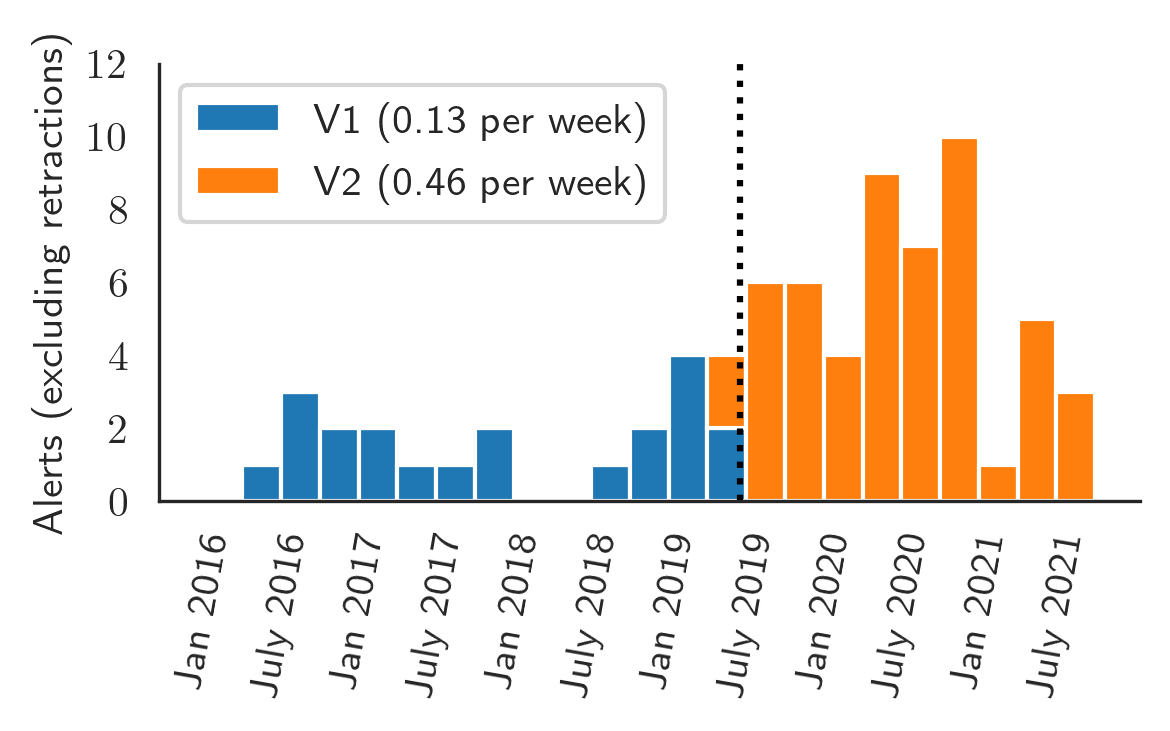

In [8]:
dates = [Time(f"20{x[2:4]}-{x[4:6]}-{x[6:8]}T00:00:01") for x in joint["Event"]]

plt.figure(figsize=(base_width, base_height), dpi=dpi)
ax1 = plt.subplot(111)

mjds = []
labs = []
bins = []

for year in range(2016, 2022):
    for k, month in enumerate([1, 4, 7, 10]):
        
        t = Time(f"{year}-{month}-01T00:00:00.01", format='isot', scale='utc').mjd
        
        bins.append(t)
        
        if (k - 1) % 2 > 0:
                    
            mjds.append(t)
            labs.append(["Jan", "July"][int(k/2)] + f" {year}")
            
t_0 = Time(f"2016-04-01T00:00:00.01", format='isot', scale='utc').mjd 
            
v1_t = Time(f"2019-06-17T00:00:00.01", format='isot', scale='utc').mjd

t_now = Time.now().mjd

alerts_v1 = [x.mjd for i, x in enumerate(dates) if np.logical_and(x.mjd < v1_t, not np.isnan(joint.iloc[i]["Dec"]))]

alerts_v2 = [x.mjd for i, x in enumerate(dates) if np.logical_and(
    x.mjd > v1_t, not np.isnan(joint.iloc[i]["Dec"]))]

print(f'{len(alerts_v1)} V1 alerts, {len(alerts_v2)} V2 alerts')

mod = 7.

v1_rate = mod * float(len(alerts_v1))/(v1_t - t_0)
v2_rate = mod * float(len(alerts_v2))/(t_now - v1_t)

labels = []

for (name, rate) in [("V1", v1_rate), ("V2", v2_rate)]:
    labels.append(f'{name} ({rate:.2f} per week)')
    
plt.xticks(mjds, labs, rotation=80)
plt.locator_params(axis="y", nbins=6)
plt.hist([alerts_v1, alerts_v2], bins=bins, stacked=True, label=labels)

plt.axvline(v1_t, linestyle=":", color="k")

plt.tick_params(axis='both', which='major', labelsize=big_fontsize)
plt.legend(fontsize=big_fontsize, loc="upper left")

plt.ylabel("Alerts (excluding retractions)", fontsize=big_fontsize)

sns.despine()

plt.ylim(0., 12.)
plt.tight_layout()

filename = "alert_hist.pdf"

output_path = os.path.join(output_folder, filename)
plt.savefig(f"plots/{filename}")
plt.savefig(output_path, bbox_inches='tight', pad_inches=0)

NameError: name 'joint' is not defined

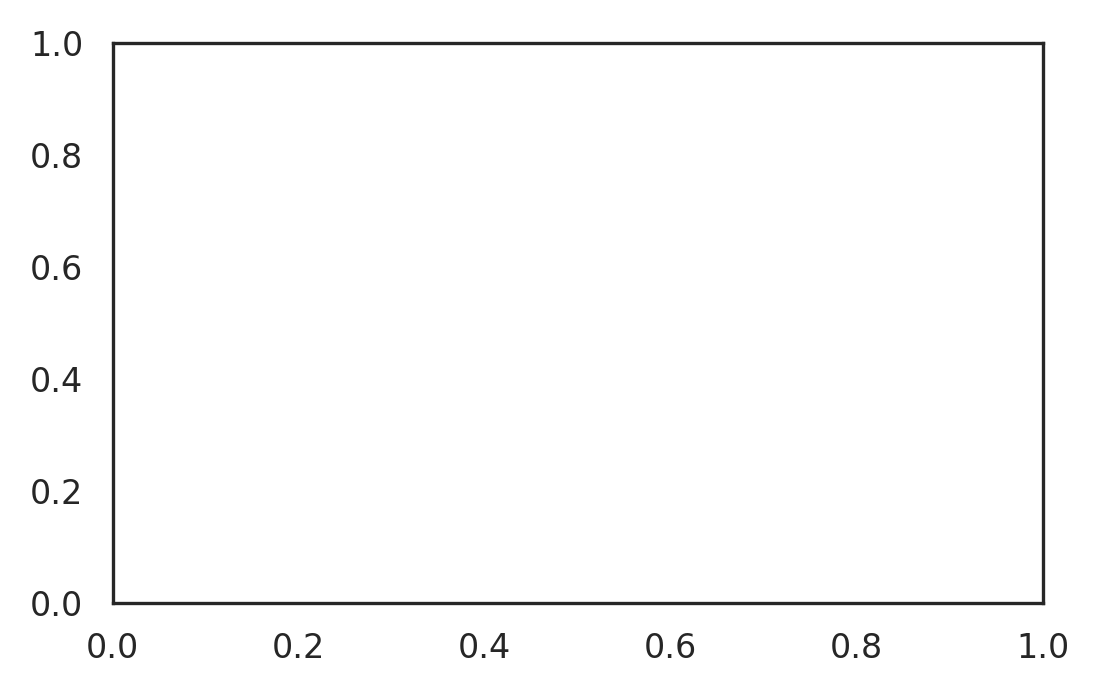

In [8]:
plt.figure(figsize=(base_width, base_height), dpi=dpi)
ax1 = plt.subplot(111)

dates = [Time(f"20{x[2:4]}-{x[4:6]}-{x[6:8]}T00:00:01") for x in joint["Event"]]

mjds = []
labs = []
bins = []

for year in range(2016, 2022):
    for k, month in enumerate([1, 4, 7, 10]):
        
        t = Time(f"{year}-{month}-01T00:00:00.01", format='isot', scale='utc').mjd
        
        bins.append(t)
        
        if (k - 1) % 2 > 0:
                    
            mjds.append(t)
            labs.append(["Jan", "July"][int(k/2)] + f" {year}")
            
t_0 = Time(f"2016-04-01T00:00:00.01", format='isot', scale='utc').mjd 
            
v1_t = Time(f"2019-06-17T00:00:00.01", format='isot', scale='utc').mjd

t_now = Time.now().mjd

print(joint.iloc[0]["Dec"])

alerts_v1 = [x.mjd for i, x in enumerate(dates) if np.logical_and(x.mjd < v1_t, not np.isnan(joint.iloc[i]["Dec"]))]

alerts_v2 = [x.mjd for i, x in enumerate(dates) if np.logical_and(
    x.mjd > v1_t, not np.isnan(joint.iloc[i]["Dec"]))]

print(f'{len(alerts_v1)} V1 alerts, {len(alerts_v2)} V2 alerts')

mod = 7.

v1_rate = mod * float(len(alerts_v1))/(v1_t - t_0)
v2_rate = mod * float(len(alerts_v2))/(t_now - v1_t)

labels = []

for (name, rate) in [("HESE/EHE", v1_rate), ("Gold/Bronze", v2_rate)]:
    labels.append(f'{name} ({rate:.2f} per week)')
    
plt.xticks(mjds, labs, rotation=80)
plt.locator_params(axis="y", nbins=6)
plt.hist([alerts_v1, alerts_v2], bins=bins[:-1], stacked=True, label=labels, cumulative=True)

plt.axvline(v1_t, linestyle=":", color="k")

plt.tick_params(axis='both', which='major', labelsize=big_fontsize)
plt.legend(fontsize=big_fontsize, loc="upper left")

sns.despine()

# plt.ylim(0., 12.)
plt.ylabel("IceCube Realtime Alerts (excluding retractions)", fontsize=big_fontsize)
plt.tight_layout()

filename = "alert_cdf.pdf"

output_path = os.path.join(output_folder, filename)
# plt.savefig(f"plots/{filename}")
# plt.savefig(output_path, bbox_inches='tight', pad_inches=0)

1 V1 alerts, 22 V2 alerts


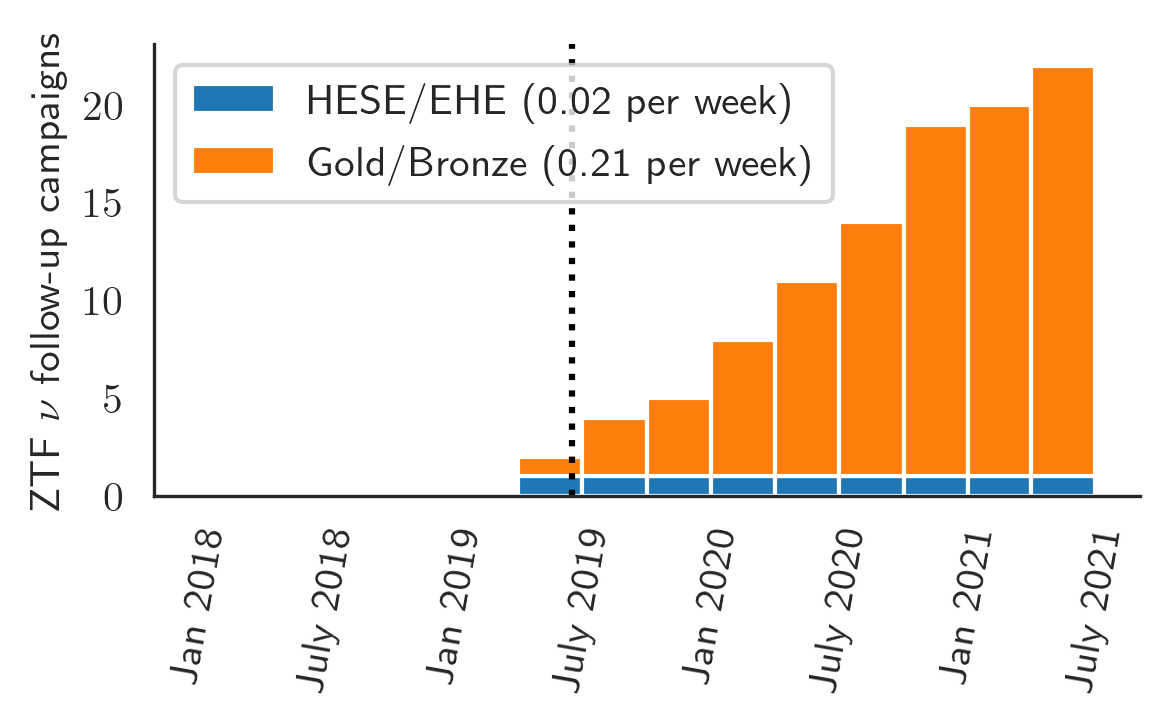

In [10]:
plt.figure(figsize=(base_width, base_height), dpi=dpi)
ax1 = plt.subplot(111)

dates = [Time(f"20{x[2:4]}-{x[4:6]}-{x[6:8]}T00:00:01") for x in obs["Event"]]

mjds = []
labs = []
bins = []

for year in range(2018, 2022):
    for k, month in enumerate([1, 4, 7, 10]):
        
        t = Time(f"{year}-{month}-01T00:00:00.01", format='isot', scale='utc').mjd
        
        bins.append(t)
        
        if (k - 1) % 2 > 0:
                    
            mjds.append(t)
            labs.append(["Jan", "July"][int(k/2)] + f" {year}")
            
t_0 = Time(f"2018-04-01T00:00:00.01", format='isot', scale='utc').mjd 
            
v1_t = Time(f"2019-06-17T00:00:00.01", format='isot', scale='utc').mjd

t_now = Time(f"2021-07-01T00:00:00.01", format='isot', scale='utc').mjd

t_bran_cut = Time(f"2020-02-01T00:00:00.01", format='isot', scale='utc').mjd

alerts_v1 = [x.mjd for x in dates if x.mjd < v1_t]

alerts_v2 = [x.mjd for x in dates if x.mjd > v1_t]

print(f'{len(alerts_v1)} V1 alerts, {len(alerts_v2)} V2 alerts')

mod = 7.

v1_rate = mod * float(len(alerts_v1))/(v1_t - t_0)
v2_rate = mod * float(len(alerts_v2))/(t_now - v1_t)

labels = []

for (name, rate) in [("HESE/EHE", v1_rate), ("Gold/Bronze", v2_rate)]:
    labels.append(f'{name} ({rate:.2f} per week)')
    
plt.xticks(mjds, labs, rotation=80)
plt.locator_params(axis="y", nbins=6)
plt.hist([alerts_v1, alerts_v2], bins=bins[:-1], stacked=True, label=labels, cumulative=True)

plt.axvline(v1_t, linestyle=":", color="k")
# plt.axvline(t_bran_cut, linestyle="--", color="k")

plt.tick_params(axis='both', which='major', labelsize=big_fontsize)
plt.legend(fontsize=big_fontsize, loc="upper left")

sns.despine()

# plt.ylim(0., 12.)
plt.ylabel(r"ZTF $\nu$ follow-up campaigns", fontsize=big_fontsize)
plt.tight_layout()

filename = "ztf_cdf.pdf"

output_path = os.path.join(output_folder, filename)
plt.savefig(f"plots/{filename}")
plt.savefig(output_path, bbox_inches='tight', pad_inches=0)

In [11]:
classes = list(set(joint["Class"]))

for x in classes:
    n_obs = np.sum(obs["Class"] == x)
    n_tot = np.sum(np.logical_and(joint["Class"]==x, ~np.isnan(joint["Dec"])))
    n_retracted = np.sum(np.logical_and(joint["Class"]==x, np.isnan(joint["Dec"])))
    print(f'For {x}: we have observed ({int(n_obs)}/{int(n_tot)}), or {100.*n_obs/n_tot:.1f}\%')
    print(f"There were an extra {n_retracted} events that were retracted.")
    

For HESE+EHE: we have observed (0/1), or 0.0\%
There were an extra 0 events that were retracted.
For GOLD: we have observed (14/19), or 73.7\%
There were an extra 3 events that were retracted.
For EXTRA: we have observed (1/2), or 50.0\%
There were an extra 0 events that were retracted.
For BRONZE: we have observed (7/32), or 21.9\%
There were an extra 3 events that were retracted.
For HESE: we have observed (0/12), or 0.0\%
There were an extra 5 events that were retracted.
For EHE: we have observed (1/8), or 12.5\%
There were an extra 0 events that were retracted.


In [12]:
f_det = 0.4

# sum plus assume 50% for extra
n_astro = np.sum(obs["Signalness"]) + 0.5

# n_exp 90% lower bound
n_det = 0.25

print(f'We have observed {n_astro:.2f} astrophysical neutrinos')

print(f'Two TDEs were detected, corresponding to a 90% lower bound of {n_det}')

frac_det = n_det/n_astro

print(f'This implies a minimum fraction of {100.*frac_det:.2f}% neutrinos from ZTF-detected TDEs')

frac_tot = frac_det/f_det

print(f'This implies a minimum fraction of {100.*frac_tot:.2f}% neutrinos from all TDEs')

We have observed 10.78 astrophysical neutrinos
Two TDEs were detected, corresponding to a 90% lower bound of 0.25
This implies a minimum fraction of 2.32% neutrinos from ZTF-detected TDEs
This implies a minimum fraction of 5.80% neutrinos from all TDEs


In [13]:
7800./6562.8 - 1.

0.1885170963613092

In [14]:
print(f'We have observed {tot_area:.2f} sq. deg.')

We have observed 153.16 sq. deg.


In [15]:
from scipy.stats import norm, poisson

tde_density = 2.0 * 10. ** -4. * 1.12

ztf_obs = tot_area

n_exp = tde_density * tot_area

def nexp_convert(nexp, n_det=2):
    
    cdf = poisson(nexp).cdf(n_det-1)

    p_val = 1. - cdf

    sigma = norm.ppf(cdf)
    
    return p_val, sigma

print(nexp_convert(n_exp, n_det=1))

print(nexp_convert(n_exp))

print(nexp_convert(n_exp*0.15))

print(nexp_convert(n_exp*0.3, n_det=3))

(0.033725998940380864, 1.828650396055413)
(0.0005752251158676058, 3.250888360604671)
(1.3196222315881023e-05, 4.2025504125086846)
(1.8031882598190663e-07, 5.088641493107997)
